<b>Imported Library, Please import all library that you needed on this project</b>

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pylab 
import sklearn
import missingno as msno
import xgboost as xgb

In [2]:
df = pd.read_csv("german_credit_data_with_risk.csv",index_col=[0])

In [3]:
df.head(20)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [4]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


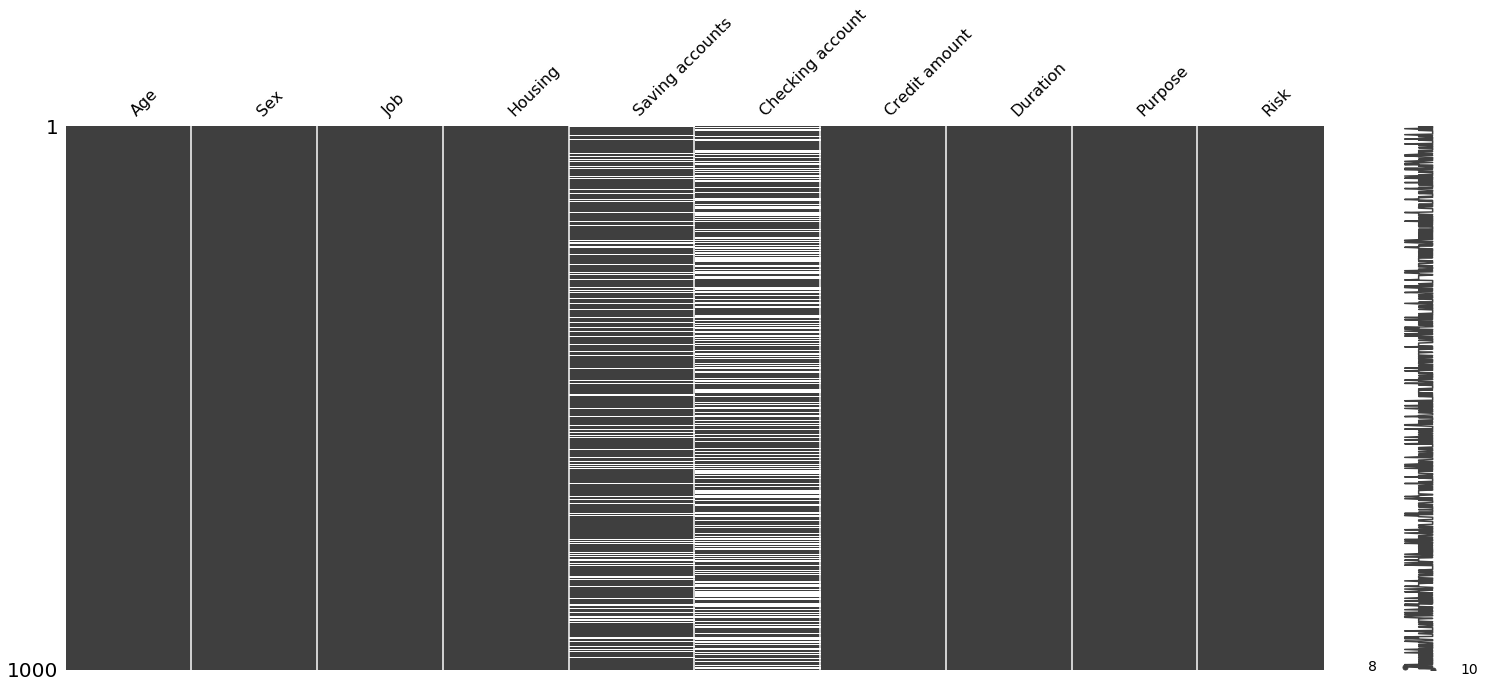

In [6]:
msno.matrix(df)

<b>Check the output of each categorical variable</b>

In [7]:
for column in df.columns:
    if df[column].dtype == "object":
        print(column + ":")
        print(df[column].unique())
        print("\n")

Sex:
['male' 'female']


Housing:
['own' 'free' 'rent']


Saving accounts:
[nan 'little' 'quite rich' 'rich' 'moderate']


Checking account:
['little' 'moderate' nan 'rich']


Purpose:
['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


Risk:
['good' 'bad']




<b>Check the proportion of the saving accounts output</b>

In [8]:
df["Saving accounts"].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

<b>Check the proportion of the checking account output</b>

In [9]:
df["Checking account"].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

<b>Encode the categorical variable</b>

In [10]:
df_transform1 = df.loc[:]
df_transform1                     = df_transform1.interpolate(method="pad")
df_transform1["Sex"]              = df_transform1["Sex"].apply(lambda x:1 if x=="male" else 0)
df_transform1["Housing"]          = df_transform1["Housing"].apply(lambda x: 0 if x=="free" else 1 if x=="rent" else 2)
df_transform1["Saving accounts"]  = df_transform1["Saving accounts"].apply(lambda x: 0 if x=="little" else 1 if x=="moderate" else 2 if x=="rich" else 3)
df_transform1["Checking account"] = df_transform1["Checking account"].apply(lambda x: 0 if x=="little" else 1 if x=="moderate" else 2)
df_transform1["Purpose"]          = df_transform1["Purpose"].apply(lambda x: 0 if x=="radio/TV" else 1 if x=="education" else 2 if x=="furniture/equipment" else 3 if x=="car" else 4 if x=="business" else 5 if x=="domestic appliance" else 6 if x=="repairs" else 7)
df_transform1["Risk"]             = df_transform1["Risk"].apply(lambda x: 1 if x=="good" else 0)

<b>Plot the distribution of each variable</b>

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


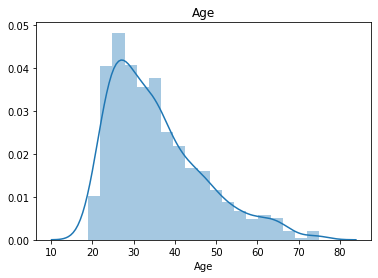

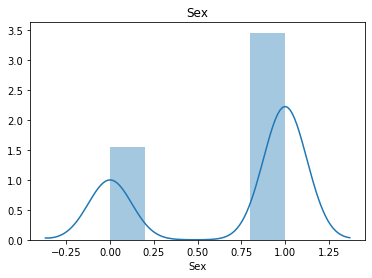

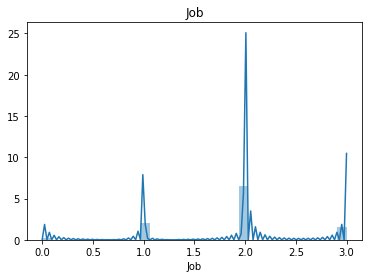

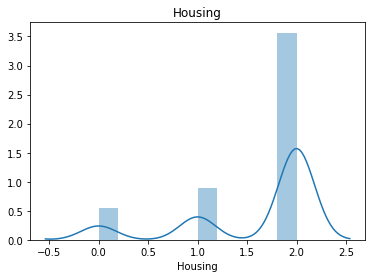

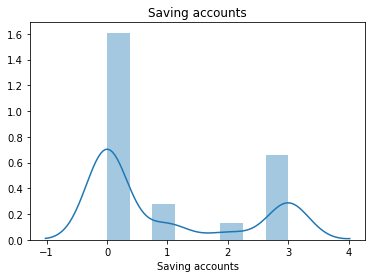

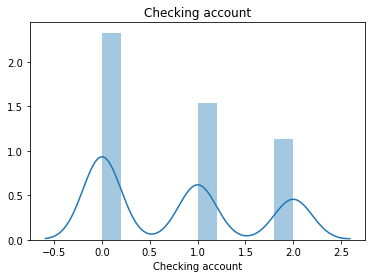

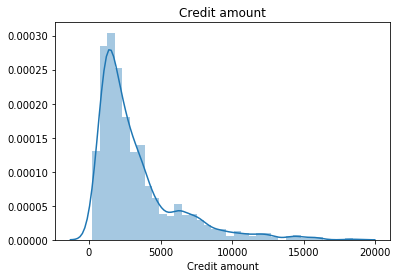

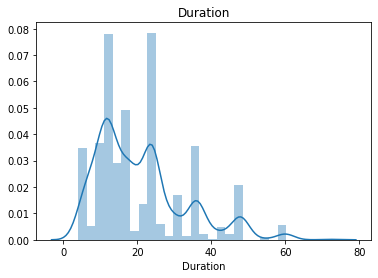

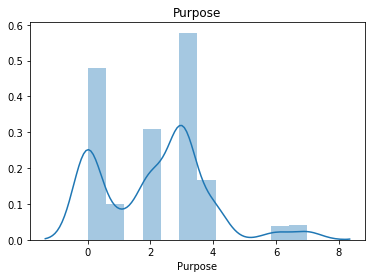

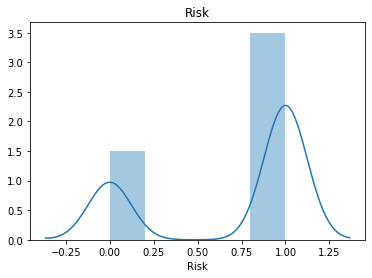

In [11]:
for col in df_transform1.columns:
    fig, ax = plt.subplots(1,1)
    sns.distplot(df_transform1[col]).set_title(col)
    fig.show()

<b>Plot the distribution of each variable and grouping them with target variable</b>

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


<Figure size 720x576 with 0 Axes>

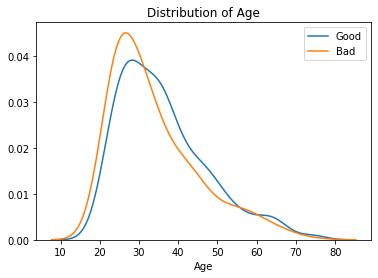

<Figure size 720x576 with 0 Axes>

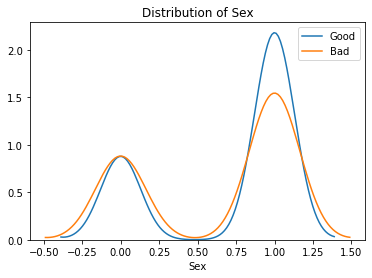

<Figure size 720x576 with 0 Axes>

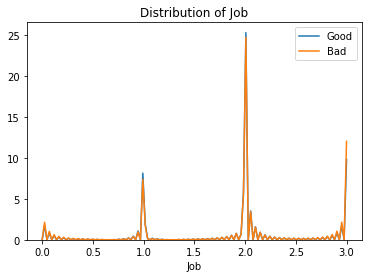

<Figure size 720x576 with 0 Axes>

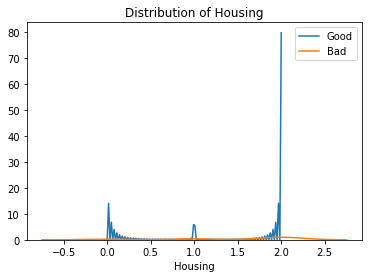

<Figure size 720x576 with 0 Axes>

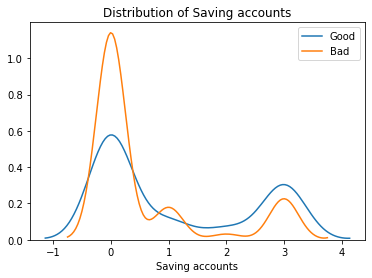

<Figure size 720x576 with 0 Axes>

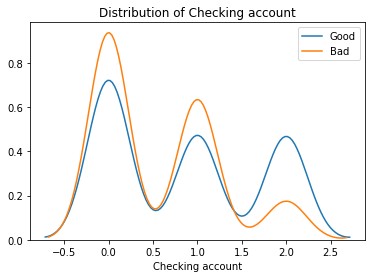

<Figure size 720x576 with 0 Axes>

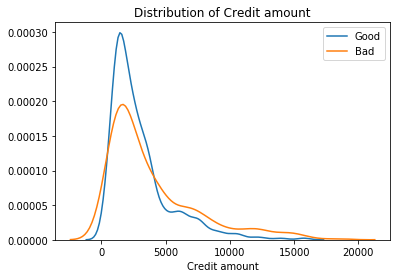

<Figure size 720x576 with 0 Axes>

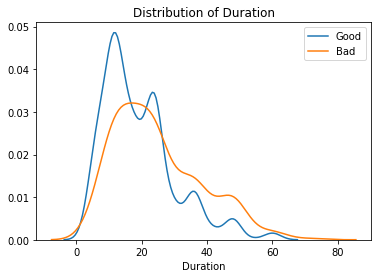

<Figure size 720x576 with 0 Axes>

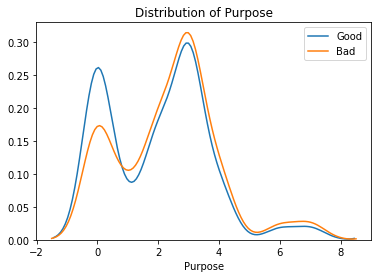

In [12]:
good = df_transform1[df_transform1["Risk"]==1]
bad  = df_transform1[df_transform1["Risk"]==0]
for col in df_transform1.columns:
    if col != "Risk":
        plt.figure(figsize = (10, 8))
        fig, ax = plt.subplots(1,1)
        sns.distplot(good[col],hist=False,label="Good")
        sns.distplot(bad[col],hist=False,label="Bad")
        plt.title("Distribution of "+col)
        fig.show()

<b>Plot the correlation matrix</b>

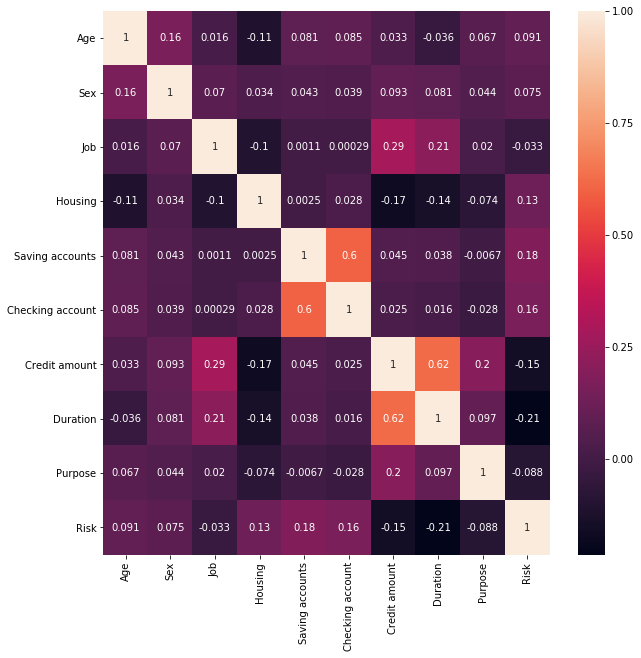

In [13]:
corr = df_transform1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

<b>Remove the outliers</b>

In [14]:
outlier_idx = []
imp_column  = ["Age","Credit amount","Duration"]
for column in imp_column:
    if column != "Risk" and df[column].dtype != "O":
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr  = q3-q1
        low  = q1-1.5*iqr 
        high = q3+1.5*iqr
        a = ((df[(df[column] < low ) | (df[column] > high)][column]).index)
        for i in a:
            outlier_idx.append(i)
            
outlier_idx = list(dict.fromkeys(outlier_idx))
print("The number of outliers: ")
print(len(outlier_idx))

df_transform1 = df_transform1.drop(outlier_idx)
df_transform1 = df_transform1.reset_index(drop=True)

The number of outliers: 
138


In [15]:
y         = df_transform1["Risk"]
x         = df_transform1.drop(["Risk"],axis=1)

<b>LogReg Model + StratifiedKFold + Confusion Matrix</b>

Confusion matrix on fold-1


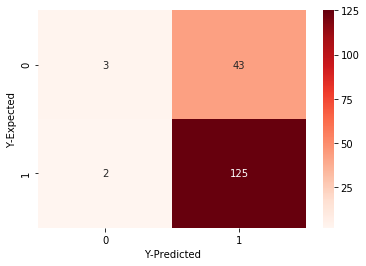

AUC ROC Curve on fold-1


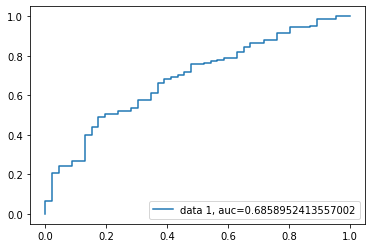

Confusion matrix on fold-2


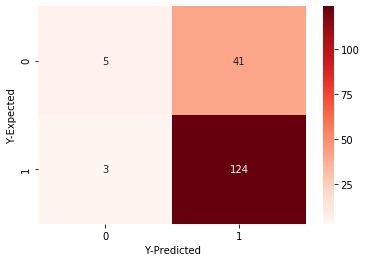

AUC ROC Curve on fold-2


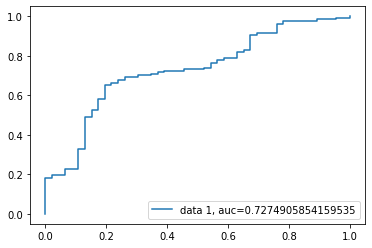

Confusion matrix on fold-3


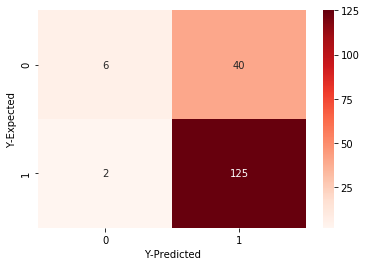

AUC ROC Curve on fold-3


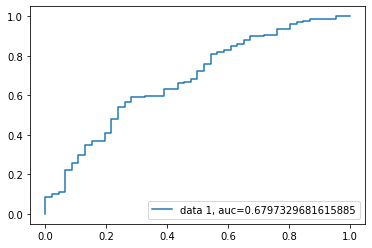

Confusion matrix on fold-4


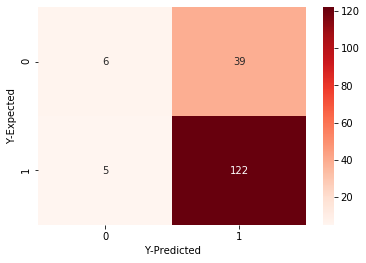

AUC ROC Curve on fold-4


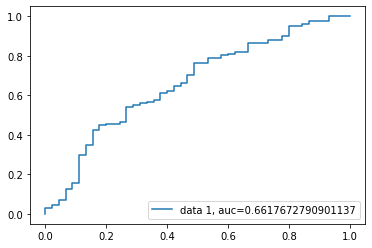

Confusion matrix on fold-5


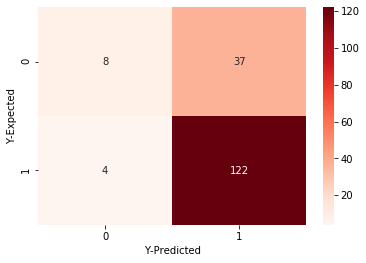

AUC ROC Curve on fold-5


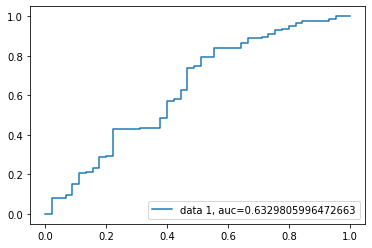

In [16]:
lr           = logreg(random_state=0, solver="lbfgs", multi_class="multinomial", max_iter=200)  
kf           = StratifiedKFold(n_splits=5, shuffle=True)
accuration   = []
i            = 0
for train_idx, test_idx in kf.split(x,y):
    i += 1
    x_train, x_test = x.loc[train_idx], x.loc[test_idx]
    y_train, y_test = y.loc[train_idx], y.loc[test_idx]
    
    lr.fit(x_train,y_train)
    
    print("Confusion matrix on fold-"+str(i))
    cnf = confusion_matrix(y_test,lr.predict(x_test))
    #cnf = confusion_matrix(Y_nn_val.data.numpy(),out_val.data.numpy())
    sns.heatmap(pd.DataFrame(cnf), annot = True, cmap = 'Reds', fmt = 'd')
    plt.xlabel('Y-Predicted')
    plt.ylabel('Y-Expected')
    plt.show()
    
    print("AUC ROC Curve on fold-"+str(i))
    y_pred_proba = lr.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    accuration.append(accuracy_score(y_test,lr.predict(x_test)))

accuration = np.array(accuration)    

In [17]:
print(accuration)

[0.73988439 0.74566474 0.75722543 0.74418605 0.76023392]


In [18]:
print(np.mean(accuration))

0.7494389062228543


<b>XGB Model + StratifiedKFold + Confusion Matrix</b>

Confusion matrix on fold-1


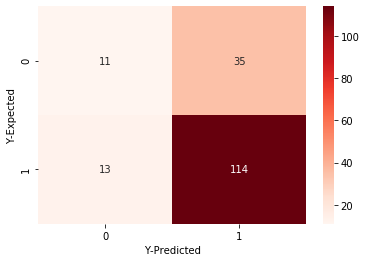

AUC ROC Curve on fold-1


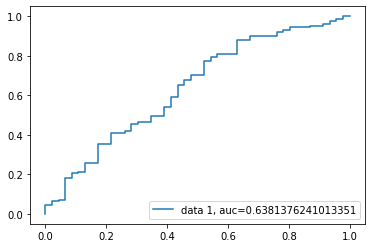

Confusion matrix on fold-2


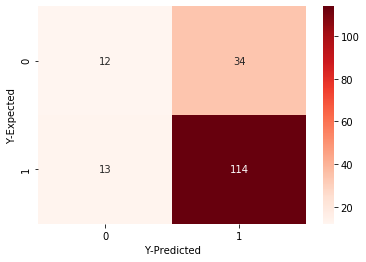

AUC ROC Curve on fold-2


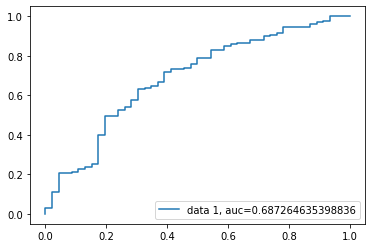

Confusion matrix on fold-3


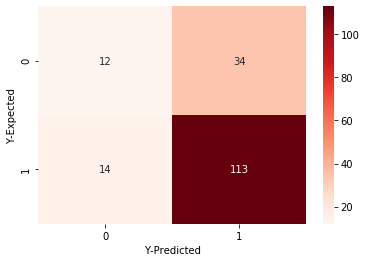

AUC ROC Curve on fold-3


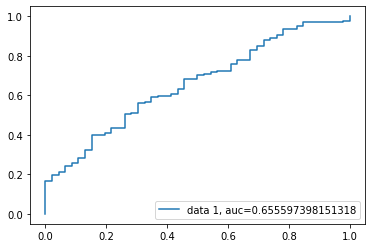

Confusion matrix on fold-4


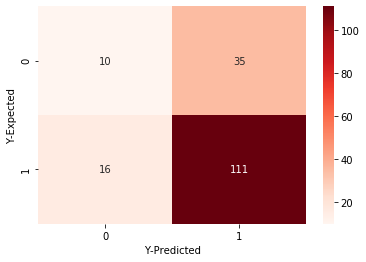

AUC ROC Curve on fold-4


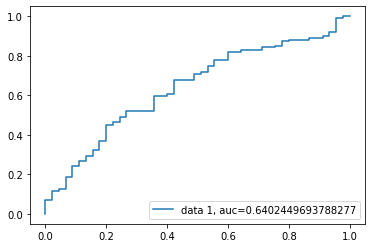

Confusion matrix on fold-5


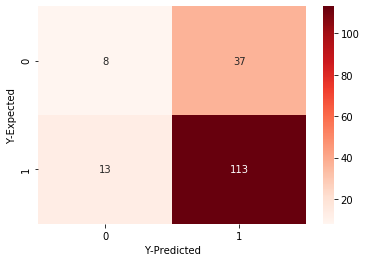

AUC ROC Curve on fold-5


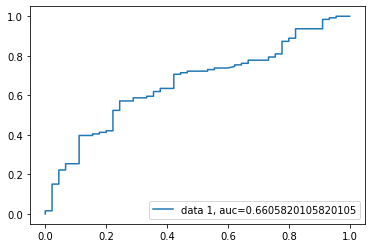

In [19]:
model_xgb    = xgb.XGBClassifier(random_state=1,learning_rate=0.01,max_depth=8,n_estimators=400)
kf           = StratifiedKFold(n_splits=5, shuffle=True)
accuration   = []
i            = 0
for train_idx, test_idx in kf.split(x,y):
    i += 1
    x_train, x_test = x.loc[train_idx], x.loc[test_idx]
    y_train, y_test = y.loc[train_idx], y.loc[test_idx]
    
    model_xgb.fit(x_train,y_train)
    accuration.append(accuracy_score(y_test,model_xgb.predict(x_test)))
    
    print("Confusion matrix on fold-"+str(i))
    cnf = confusion_matrix(y_test,model_xgb.predict(x_test))
    #cnf = confusion_matrix(Y_nn_val.data.numpy(),out_val.data.numpy())
    sns.heatmap(pd.DataFrame(cnf), annot = True, cmap = 'Reds', fmt = 'd')
    plt.xlabel('Y-Predicted')
    plt.ylabel('Y-Expected')
    plt.show()
    
    print("AUC ROC Curve on fold-"+str(i))
    y_pred_proba = model_xgb.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

accuration = np.array(accuration) 

In [20]:
print(accuration)
print(np.mean(accuration))

[0.72254335 0.7283237  0.72254335 0.70348837 0.70760234]
0.7169002231797175


<b>Random Forest Model + StratifiedKFold + Confusion Matrix</b>

Confusion matrix on fold-1


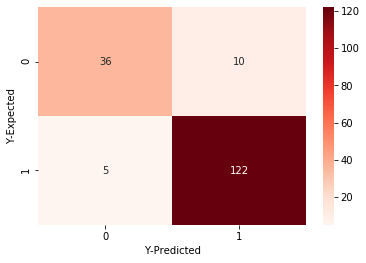

AUC ROC Curve on fold-1


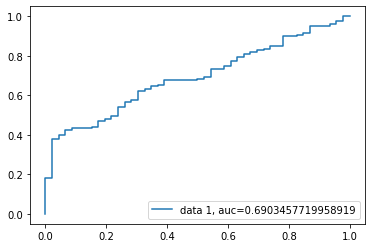

Confusion matrix on fold-2


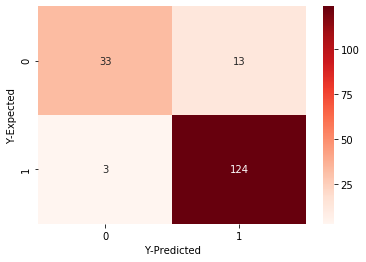

AUC ROC Curve on fold-2


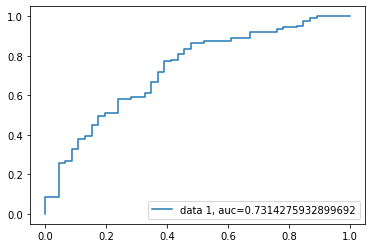

Confusion matrix on fold-3


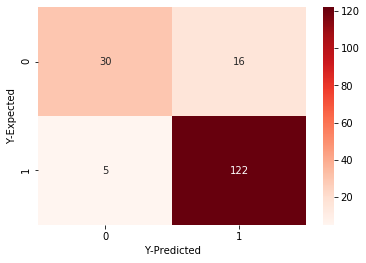

AUC ROC Curve on fold-3


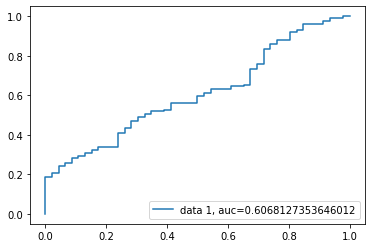

Confusion matrix on fold-4


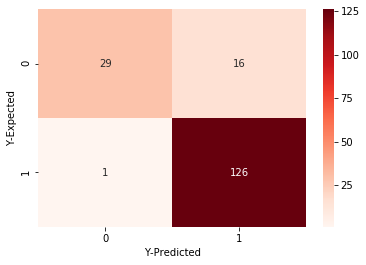

AUC ROC Curve on fold-4


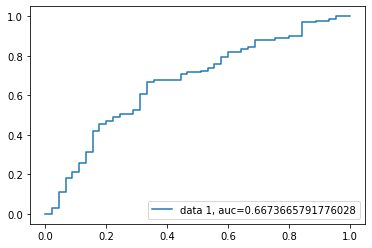

Confusion matrix on fold-5


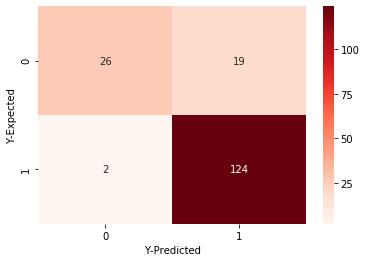

AUC ROC Curve on fold-5


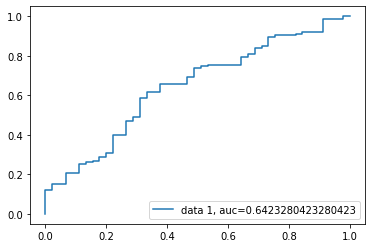

In [21]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500, max_depth=10,random_state=0)
kf           = StratifiedKFold(n_splits=5, shuffle=True)
accuration   = []
i            = 0
for train_idx, test_idx in kf.split(x,y):
    i += 1
    x_train, x_test = x.loc[train_idx], x.loc[test_idx]
    y_train, y_test = y.loc[train_idx], y.loc[test_idx]

    print("Confusion matrix on fold-"+str(i))
    clf.fit(x_train,y_train)
    accuration.append(accuracy_score(y_test,model_xgb.predict(x_test)))
    
    cnf = confusion_matrix(y_test,model_xgb.predict(x_test))
    #cnf = confusion_matrix(Y_nn_val.data.numpy(),out_val.data.numpy())
    sns.heatmap(pd.DataFrame(cnf), annot = True, cmap = 'Reds', fmt = 'd')
    plt.xlabel('Y-Predicted')
    plt.ylabel('Y-Expected')
    plt.show()
    
    print("AUC ROC Curve on fold-"+str(i))
    y_pred_proba = clf.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

accuration = np.array(accuration) 

In [22]:
print(accuration)
print(np.mean(accuration))

[0.9132948  0.90751445 0.87861272 0.90116279 0.87719298]
0.8955555476943469
